In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import os.path as path
import numpy as np
import torch
from matplotlib.patches import Rectangle
from glob import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import cv2
import random
import math
import seaborn as sns
sns.set(font_scale=1.5)
from pprint import pprint
from IPython.display import HTML # to show the animation in Jupyter
import pandas as pd
from collections import Counter
from scipy.ndimage import convolve1d

plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams["figure.autolayout"] = True
import sys
sys.path.append('../')
from src import utils, RWSampler, Inference

### Vanilla

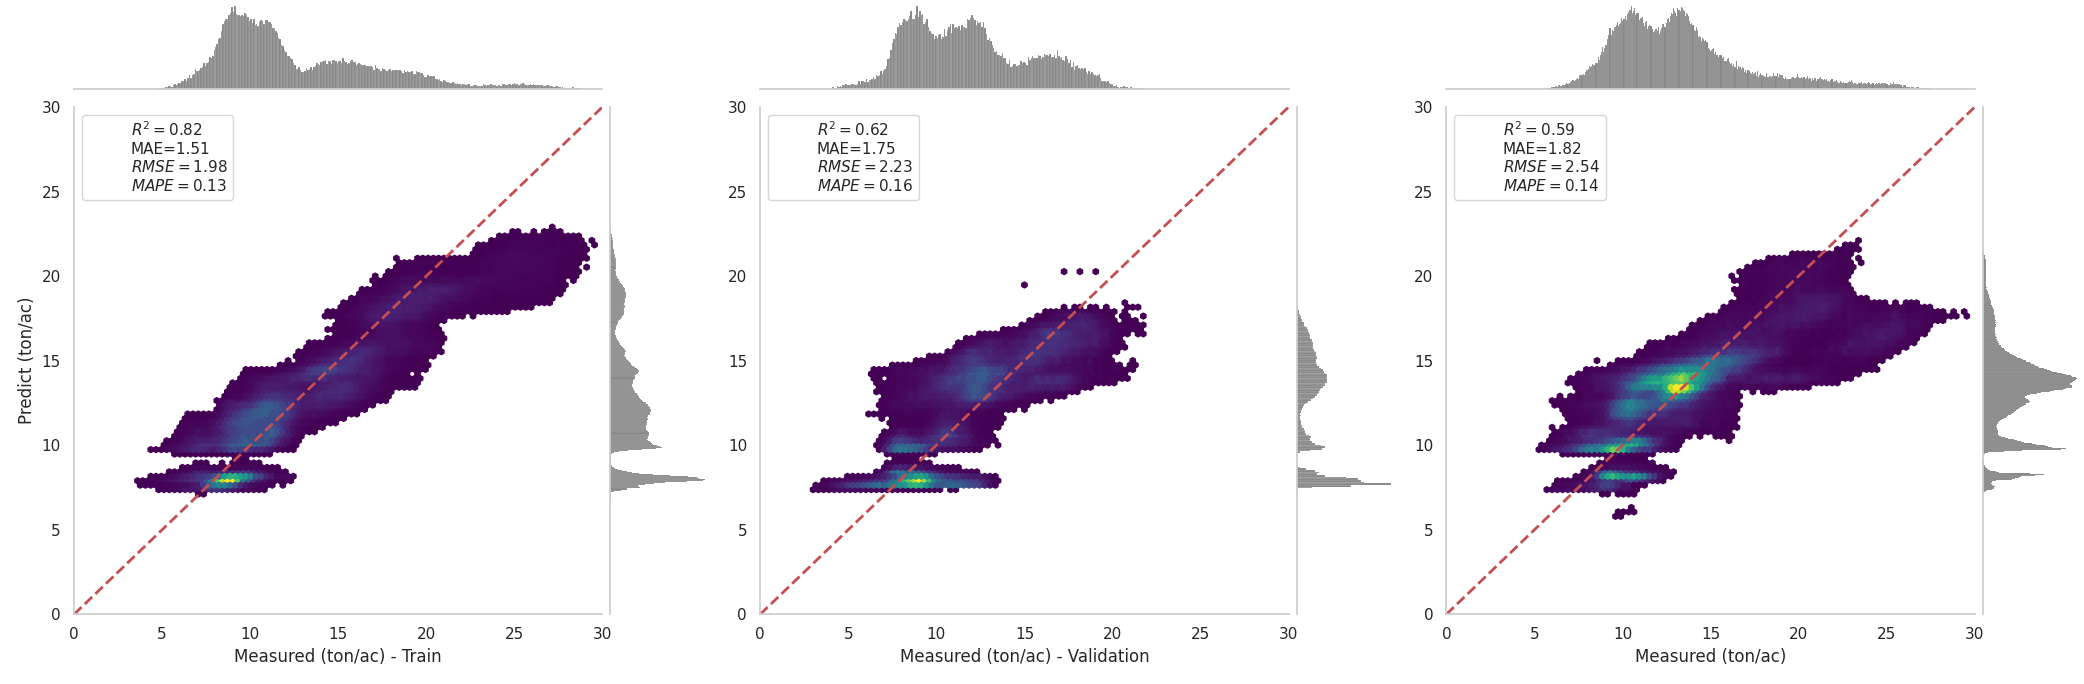

In [4]:
RGB_train_cost_vanilla = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_000_001_05_RGB_vanilla/000_001_05_RGB_vanilla_train.csv',  
                                    index_col=0) 
RGB_valid_cost_vanilla = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_000_001_05_RGB_vanilla/000_001_05_RGB_vanilla_valid.csv',  
                                    index_col=0) 
RGB_test_cost_vanilla = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_000_001_05_RGB_vanilla/000_001_05_RGB_vanilla_test.csv',  
                                    index_col=0) 
_ = Inference.train_val_test_satterplot(RGB_train_cost_vanilla, RGB_valid_cost_vanilla, RGB_test_cost_vanilla, 
                                    week = 15, 
                                    cmap  = 'viridis', 
                                    mincnt = 100, 
                                    fig_save_name = None)

In [18]:
RGB_test_cost_vanilla_Output = Inference.eval_on_three_main_label_range_pred(RGB_test_cost_vanilla, th1 = 8, th2 = 22)

C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
C1: MAE = 3.02, MAPE = 43.38 | C2: MAE = 1.50, MAPE = 12.11 | C3: MAE = 7.10, MAPE = 28.99


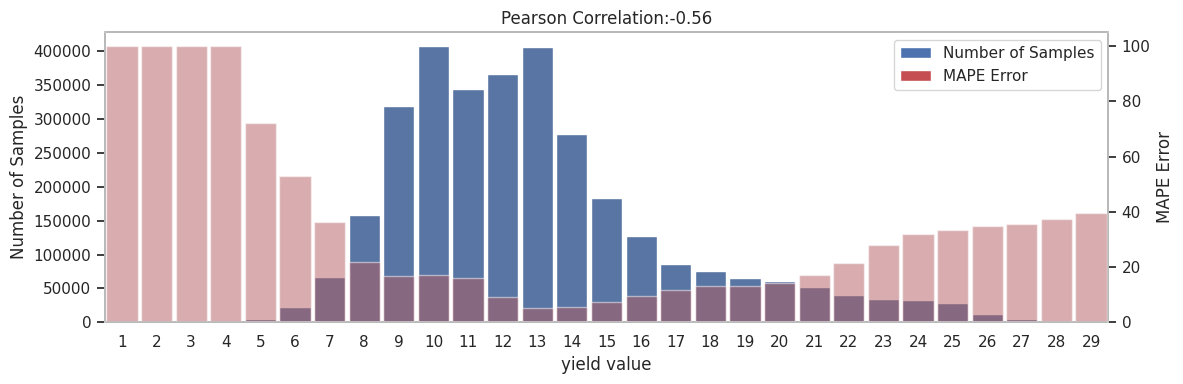

In [13]:
_ = Inference.Erroe_hist_visulization_V2(RGB_test_cost_vanilla)

### Cost Sensitive Weight Resampler 

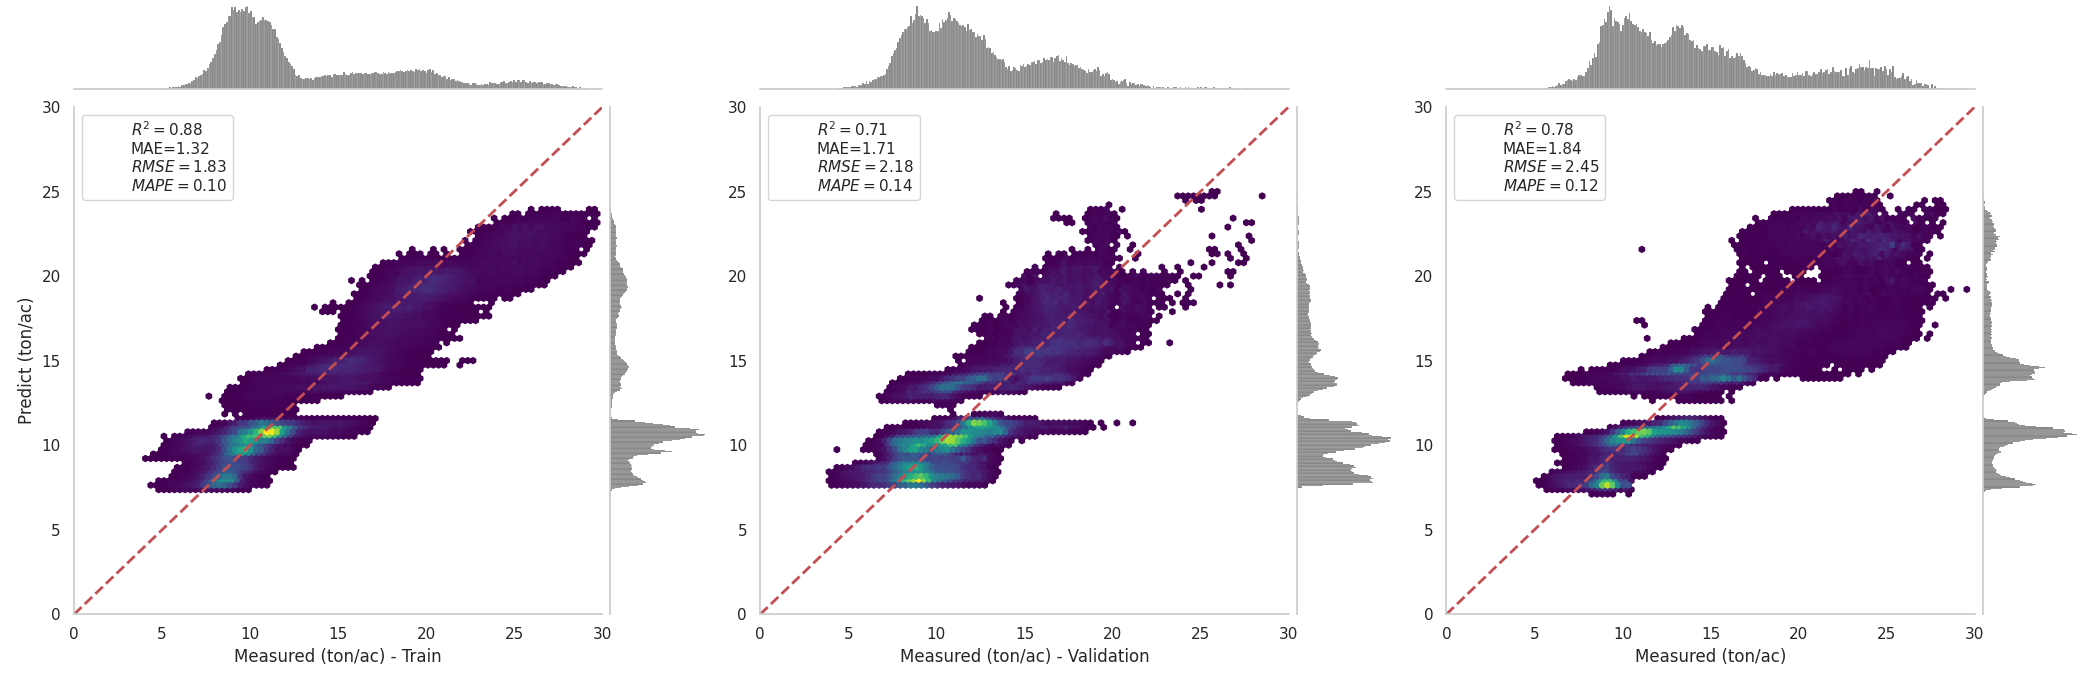

In [14]:
RGB_train_cost_sensitive  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_001_RGB_BHO/001_RGB_BHO_train.csv',  index_col=0) 
RGB_valid_cost_sensitive  = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_001_RGB_BHO/001_RGB_BHO_valid.csv',  index_col=0) 
RGB_test_cost_sensitive   = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_001_RGB_BHO/001_RGB_BHO_test.csv',  index_col=0) 
_ = Inference.train_val_test_satterplot(RGB_train_cost_sensitive, RGB_valid_cost_sensitive, RGB_test_cost_sensitive, 
                                    week = 15, 
                                    cmap  = 'viridis', 
                                    mincnt = 100, 
                                    fig_save_name = None)

In [19]:
RGB_test_cost_sensitive_Output = Inference.eval_on_three_main_label_range_pred(RGB_test_cost_sensitive, th1 = 8, th2 = 22)

C1 num samples: 95801 | C2 num samples: 2655342 | C3 num samples: 434265 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
C1: MAE = 1.53, MAPE = 22.63 | C2: MAE = 1.53, MAPE = 11.55 | C3: MAE = 3.74, MAPE = 15.13


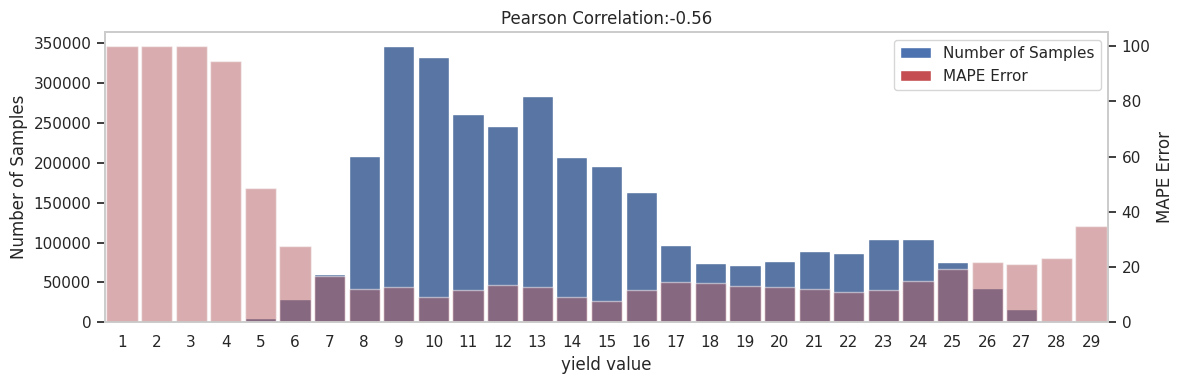

In [17]:
_ = Inference.Erroe_hist_visulization_V2(RGB_test_cost_sensitive)

In [34]:
train_coord = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_000_001_05_RGB_vanilla/coords/train.csv', index_col = 0)
avg_weights, avg_stds = RWSampler.check_cost_sensitive_reweighting(train_coord).return_pixelwise_weight()

In [15]:
cost_sensitive_effective_sample_nums, mape_errors = Inference.return_samples_error_per_bins(RGB_test_cost_sensitive)
vanilla_sample_nums, mape_errors                  = Inference.return_samples_error_per_bins(RGB_test_cost_vanilla)

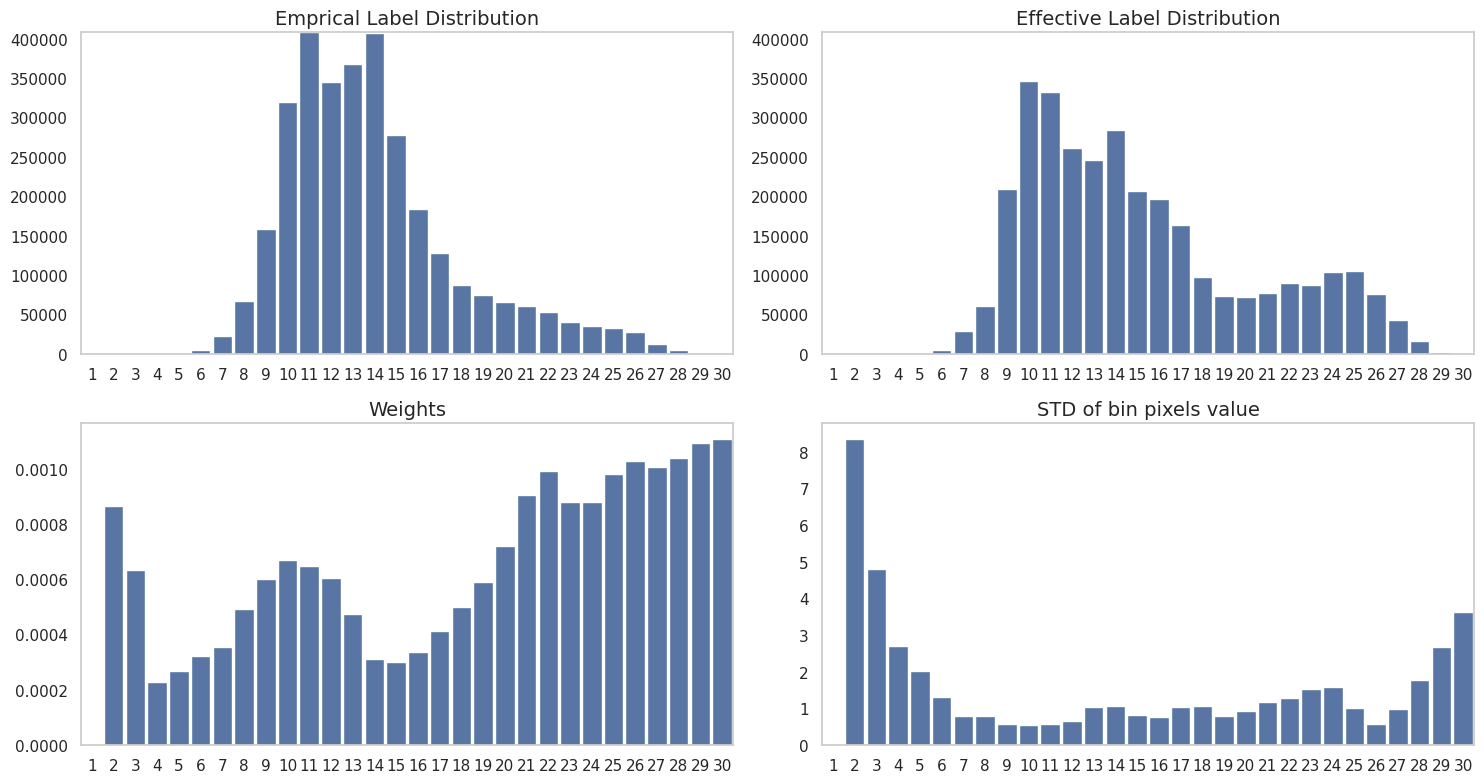

In [35]:
_ = utils.cs_emp_effective_we_std_hist_plot(vanilla_sample_nums, cost_sensitive_effective_sample_nums, avg_weights, avg_stds)

### LDS Visualization

### Perfromance 

In [21]:
RGB_test_LDS_sqinv       = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_004_001_05_RGB_LDS/004_001_05_RGB_LDS_test.csv',  index_col=0) 
RGB_test_LDS_inv         = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_005_001_05_RGB_inv_LDS/005_001_05_RGB_inv_LDS_test.csv',  index_col=0) 
RGB_test_LDS_inv_20_6    = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_006_001_05_RGB_LDSinv_20_6/006_001_05_RGB_LDSinv_20_6_test.csv',  index_col=0) 
RGB_test_LDS_sqinv_20_6    = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_007_001_05_RGB_LDS_sqinv_20_6/007_001_05_RGB_LDS_sqinv_20_6_test.csv',  index_col=0) 


In [23]:
RGB_test_cost_vanilla_Output   = Inference.eval_on_three_main_label_range_pred(RGB_test_cost_vanilla, th1 = 8, th2 = 22)
RGB_test_cost_sensitiv_Output  = Inference.eval_on_three_main_label_range_pred(RGB_test_cost_sensitive, th1 = 8, th2 = 22)
RGB_test_LDS_sqinv_Output      = Inference.eval_on_three_main_label_range_pred(RGB_test_LDS_sqinv, th1 = 8, th2 = 22)
RGB_test_LDS_inv_Output        = Inference.eval_on_three_main_label_range_pred(RGB_test_LDS_inv, th1 = 8, th2 = 22)
RGB_test_LDS_inv_20_6_Output   = Inference.eval_on_three_main_label_range_pred(RGB_test_LDS_inv_20_6, th1 = 8, th2 = 22)
RGB_test_LDS_sqinv_20_6_Output = Inference.eval_on_three_main_label_range_pred(RGB_test_LDS_sqinv_20_6, th1 = 8, th2 = 22)

C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
All: MAE = 1.82, MAPE = 0.14 | C1: MAE = 3.02, MAPE = 43.38 | C2: MAE = 1.50, MAPE = 12.11 | C3: MAE = 7.10, MAPE = 28.99
C1 num samples: 95801 | C2 num samples: 2655342 | C3 num samples: 434265 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
All: MAE = 1.84, MAPE = 0.12 | C1: MAE = 1.53, MAPE = 22.63 | C2: MAE = 1.53, MAPE = 11.55 | C3: MAE = 3.74, MAPE = 15.13
C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield value between 0 and 8, C2 is yield value between 8 and 22, and C3 is yield value bigger than 22
All: MAE = 1.74, MAPE = 0.13 | C1: MAE = 2.49, MAPE = 36.10 | C2: MAE = 1.49, MAPE = 11.43 | C3: MAE = 6.08, MAPE = 24.83
C1 num samples: 95207 | C2 num samples: 2935443 | C3 num samples: 154758 
C1 is yield va

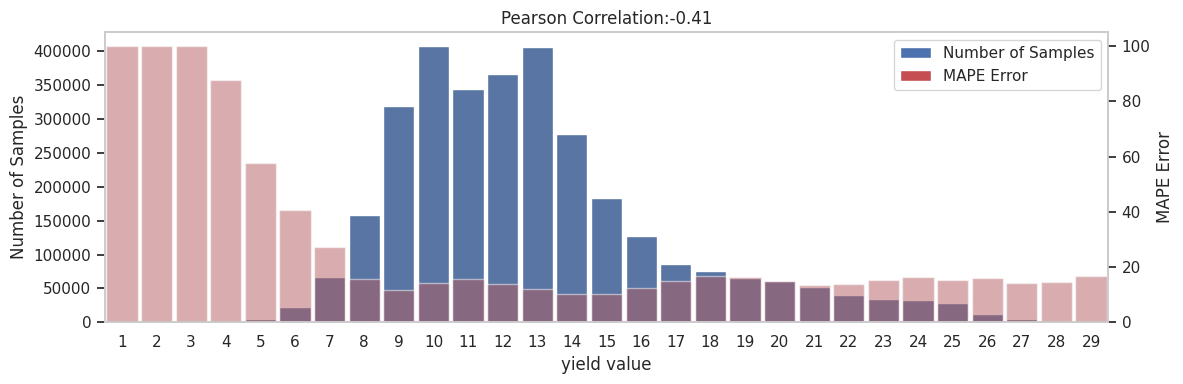

In [37]:
_ = Inference.Erroe_hist_visulization_V2(RGB_test_LDS_inv)

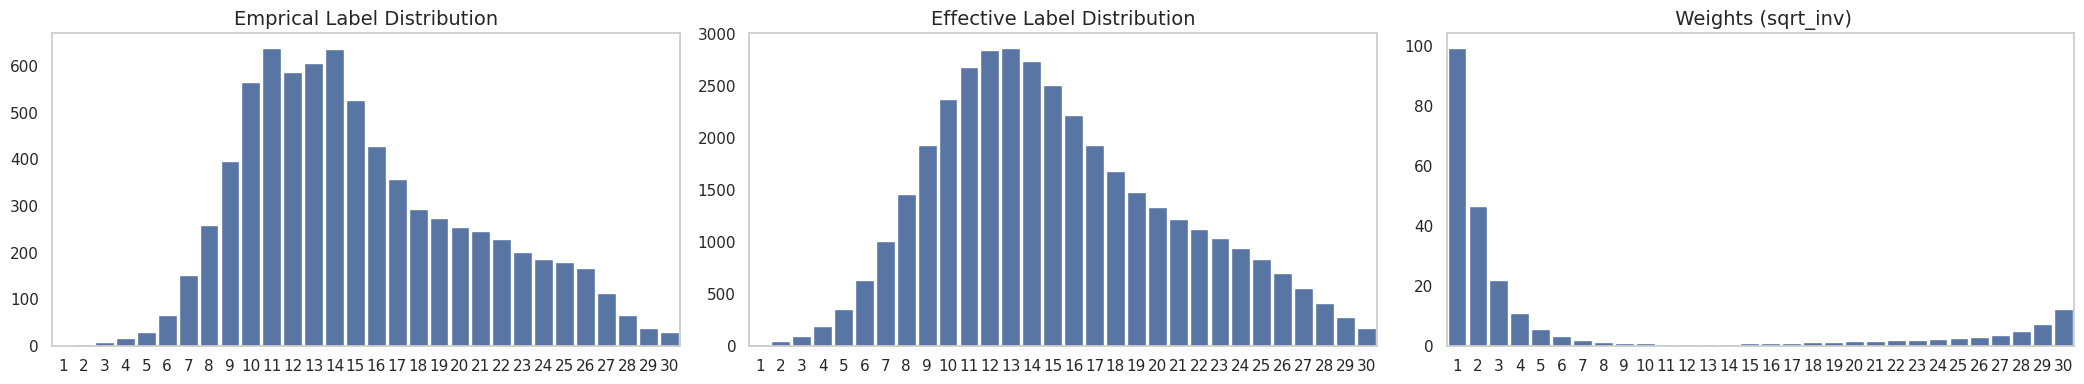

In [40]:
df = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_005_001_05_RGB_inv_LDS/coords/test.csv', index_col= 0)
weights, labels_, effective_value, emperical_values, avg_weights = RWSampler.check_lds_reweighting_(df, 
                                                                    rw_method = 'sqrt_inv', 
                                                                    lds_ks = 10, 
                                                                    lds_sigma = 2).return_pixelwise_weight()
_ = utils.triple_emp_effective_weights_hist_plot(emperical_values, effective_value, avg_weights, method = 'sqrt_inv') 

In [41]:
avg_weights

[99.19517498821584,
 46.54041019117253,
 21.837379707833183,
 10.847567043791289,
 5.734872000113695,
 3.2588591045075463,
 2.037971766167487,
 1.4082094597657504,
 1.0600806228665305,
 0.8652669469481717,
 0.7641347896838321,
 0.7205738510746215,
 0.7169957451999407,
 0.7485898649573101,
 0.8171184047589649,
 0.9240061824434279,
 1.061066552066519,
 1.220206722975572,
 1.3892625349505427,
 1.54230432519703,
 1.681433638712853,
 1.8198256288869028,
 1.9771221923488238,
 2.180062576032842,
 2.4664529355876246,
 2.9132127370780196,
 3.6766707996025594,
 4.994324199685907,
 7.3965454211219415,
 12.110083780037515]

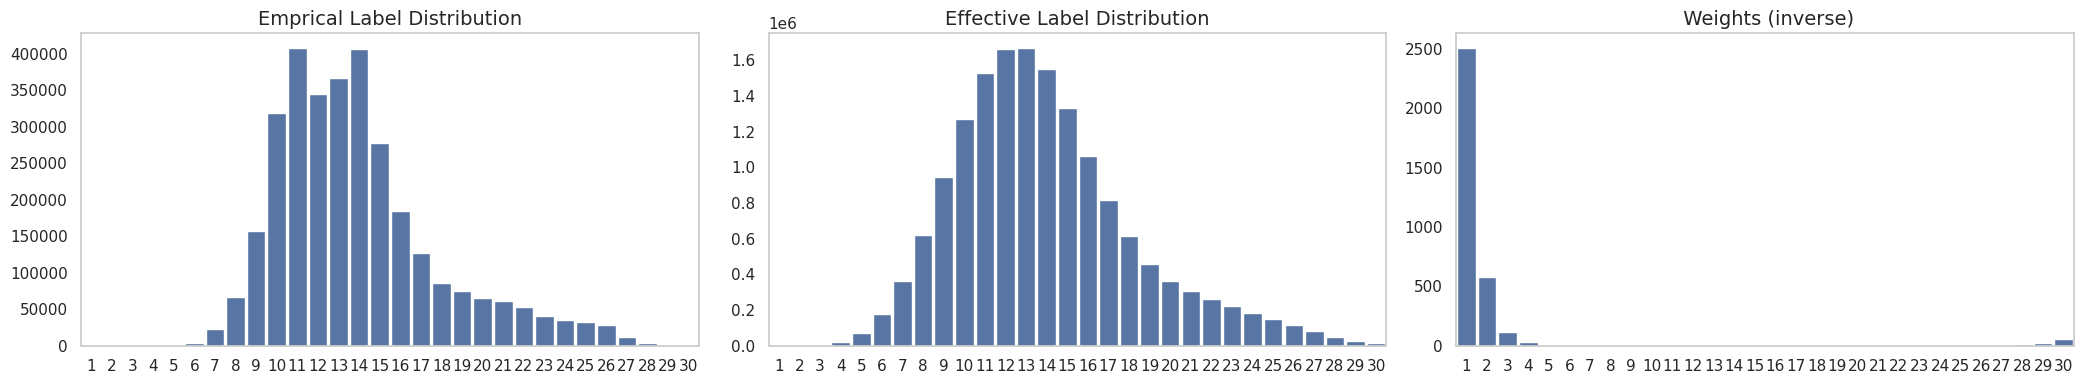

In [38]:
df = pd.read_csv('/data2/hkaman/Imbalance/EXPs/EXP_005_001_05_RGB_inv_LDS/coords/test.csv', index_col= 0)
weights, labels_, effective_value, emperical_values, avg_weights = RWSampler.check_lds_reweighting_(df, 
                                                                    rw_method = 'inverse', 
                                                                    lds_ks = 10, 
                                                                    lds_sigma = 2).return_pixelwise_weight()
_ = utils.triple_emp_effective_weights_hist_plot(emperical_values, effective_value, avg_weights, method = 'inverse')

In [39]:
avg_weights

[2505.7964900379015,
 579.2970512375691,
 117.96133254866903,
 32.258875358799635,
 10.829692584974476,
 4.273849986428601,
 2.07836462924704,
 1.2110273115901808,
 0.7984324366929642,
 0.5917571091225527,
 0.49382478752606224,
 0.45356919982985533,
 0.4519572287838439,
 0.4862399745639433,
 0.5660318124860138,
 0.7082815475388053,
 0.9229701693371978,
 1.2284576756721985,
 1.6363223643476947,
 2.0597932204972587,
 2.472455407340383,
 2.9028728563076216,
 3.4042307509316228,
 4.068378256474411,
 5.014291681137314,
 6.547547708865205,
 9.31672446349086,
 14.666603838219059,
 26.134607117213598,
 53.92855436885346]